<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Данные содержат информацию о клиентах банка и включают такие значения как баланс, кредитный рэйтинг, доход и другие, а так же информацию об отказе от услуг банка. Необходимо оценить вероятность ухода клиентов из банка. Данная задача представляется задачей классификации (уход/не уход).  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/dmitrichilov/Downloads/Churn_Modelling.csv ')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.utils import shuffle

In [ ]:
print(data.shape)
print(data.info())

(10000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


In [5]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Обнаружены пропущенные значения в столбце Tenure. Изучим значения в Tenure

In [ ]:
print(data['Tenure'].value_counts())
print(data['Tenure'].median())
print(data['Tenure'].mean())

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64
5.0
4.997690023099769


In [ ]:
display(data.query('Tenure.isna()')['Exited'].value_counts())

0    726
1    183
Name: Exited, dtype: int64

In [ ]:
display(data.query('Tenure.notna()')['Exited'].value_counts())

0    7237
1    1854
Name: Exited, dtype: int64

In [ ]:
data.query('Exited == 0')['Tenure'].mean()

5.022246787342822

In [10]:
data.query('Exited == 1')['Tenure'].mean()

4.901833872707659

Представляется возможным заменить пропущенный значения на среднее

In [11]:
# data['Tenure'] = data['Tenure'].fillna(value = data['Tenure'].mean())
data['Tenure'] = data['Tenure'].fillna(value = pd.Series(np.random.randint(0,10, size=len(data)), index=data.index))

In [12]:
print(data['Tenure'].value_counts())

1.0     1052
2.0     1040
5.0     1030
8.0     1025
7.0     1013
3.0     1007
4.0      980
6.0      978
9.0      971
0.0      458
10.0     446
Name: Tenure, dtype: int64


In [13]:
print(data.isna().sum())
print(data.duplicated().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
0


Выделим столбцы, чьи значения не существенны для построения моделей, в отдельную таблицу и удалим их из основной таблицы

In [14]:
surnames = data[['RowNumber','CustomerId','Surname']]

In [15]:
data = data.drop(['RowNumber','CustomerId', 'Surname'], axis = 1)

Переведём категориальные значения в бинарные с помощью функции pd.get_dummies 

In [16]:
data_ohe = pd.get_dummies(data, drop_first = True)

In [17]:
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null float64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


Создадим список столбцов с численными значениями

In [18]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Выделим целевой и обучающие признаки

In [19]:
target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis = 1)

Разделим данные на обучающую, валидационную и тестовую выборки

In [20]:
features_train, features_rest, target_train, target_rest = train_test_split(features,
                                                                          target, train_size=0.6, random_state=12345)

In [21]:
features_valid, features_test, target_valid, target_test = train_test_split(features_rest, 
                                                                            target_rest, test_size=0.5, random_state=12345)

In [22]:
print('Размер обущающей выборки:', len(features_train))
print('Размер валидационной выборки:', len(features_valid))
print('Размер тестовой выборки:', len(features_test))

Размер обущающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000


In [23]:
print(features_train.shape)
print(target_train.shape)

(6000, 11)
(6000,)


## Исследование задачи

Для решения задачи классификации рассмотрим модель DecisionTreeClassifier

Найдём лучший параметр (max_depth) для DecisionTreeClassifier  

In [24]:
%%time

best_model_tree = None
best_result = 0
m_depth = 0
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model.fit(features_train, target_train)
    res = model.score(features_valid, target_valid)
    if res > best_result:
        best_model_tree = model
        best_result = res
        max_depth = i     

CPU times: user 564 ms, sys: 0 ns, total: 564 ms
Wall time: 598 ms


In [25]:
print(max_depth)
print(best_result)

6
0.858


Лучший параметр для DecisionTreeClassifier max_depth = 6. Аккуратность на валидационной выборке равна 0.858

Сравним модель с константной моделью

In [26]:
best_model_tree.fit(features_train, target_train)
predicted_valid = best_model_tree.predict(features_valid)

In [27]:
print('Аккуратность модели на валидационной выборке:', accuracy_score(predicted_valid, target_valid))
print()
predicted_valid_0 = pd.Series(0, index = target_valid.index)
print('Аккуратность модели на константной модели:', accuracy_score(predicted_valid_0, target_valid))

Аккуратность модели на валидационной выборке: 0.858

Аккуратность модели на константной модели: 0.791


Аккуратность модели на валидационной выборке незначительно больше чем на константной моделе

In [28]:
print(f1_score(predicted_valid, target_valid))

0.5696969696969697


Метрика f1 неудовлетворительна

Рассмотрим модель RandomForestClassifier и определим параметры для этой модели (n-estimators and max_depth)

In [29]:
%%time

best_model_random_forest = None
best_result = 0
n_est = 0
m_depth = 0
for i in range(1,502,50):
    for j in range (1,16):
        model = RandomForestClassifier(random_state=12345, n_estimators=i, max_depth=j)
        model.fit(features_train, target_train)
        prediction = model.predict(features_valid)
        res = model.score(features_valid, target_valid)
        if res > best_result:
            best_model_random_forest = model
            best_result = res
            n_est = i
            m_depth = j      

CPU times: user 4min 54s, sys: 1.46 s, total: 4min 55s
Wall time: 4min 57s


In [30]:
print(best_result)
print(n_est)
print(m_depth)

0.8665
51
8


Создадим функцию для определения метрик

In [31]:
def scores (features, target, model):
    predicted = model.predict(features)
    probability = model.predict_proba(features)
    prob = probability[:,1]
    accuracy = accuracy_score(target, predicted)
    f1 = f1_score(target, predicted)
    roc_auc = roc_auc_score(target, prob)
    return (print('accuracy_score:', accuracy, '\n','f1_score:', f1, '\n','roc_auc_score:', roc_auc))

In [32]:
scores(features_valid, target_valid, best_model_random_forest)

accuracy_score: 0.8665 
 f1_score: 0.5781990521327014 
 roc_auc_score: 0.8500051415747736


Модель RandomForestClassifier оказывается чуть лучше, чем DecisionTreeClassifier

Рассмотрим конфигурацию confusion matrix и соотношегние положительных и отрицательных целевых значений в валидационной выборке

In [33]:
print(confusion_matrix(target_valid, predicted_valid))
#TN FP
#FN TP

[[1528   54]
 [ 230  188]]


In [34]:
print(target_valid.value_counts())

0    1582
1     418
Name: Exited, dtype: int64


Присутствует явный дисбаланс в целевых значениях: положительных решений  в три раза меньше чем отрицательных

## Борьба с дисбалансом

Повторим DecisionTreeClassifier с учетом баланса

In [35]:
%%time

best_model_tree = None
best_result = 0
m_depth = 0
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=12345)
    model.fit(features_train, target_train)
    res = model.score(features_valid, target_valid)
    if res > best_result:
        best_model_tree = model
        best_result = res
        max_depth = i     

CPU times: user 799 ms, sys: 15 µs, total: 799 ms
Wall time: 797 ms


In [36]:
print(best_result)
print(max_depth)

0.8105
5


In [37]:
scores(features_valid, target_valid, best_model_tree)

accuracy_score: 0.8105 
 f1_score: 0.5963791267305644 
 roc_auc_score: 0.8310244134068074


Результат (accuracy) с учетом class_weight='balanced' стал хуже

Попробуем уменьшить дисбаланс вручную путем уменьшения количества значений ведущих к целевому результату 0

In [38]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)


И проверим получившиеся соотношения целевых ответов

In [39]:
target_downsampled.value_counts()

0    1201
1    1196
Name: Exited, dtype: int64

И проведём тестирование моделей DecisionTreeClassifier и RandomForestClassifier

In [40]:
%%time

best_model_tree = None
best_result = 0
m_depth = 0
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth=i, class_weight='balanced', random_state=12345)
    model.fit(features_downsampled, target_downsampled)
    res = model.score(features_valid, target_valid)
    if res > best_result:
        best_model_tree = model
        best_result = res
        max_depth = i     

CPU times: user 249 ms, sys: 4.01 ms, total: 253 ms
Wall time: 264 ms


In [41]:
print(best_result)
print(max_depth)

0.799
5


In [42]:
scores(features_valid, target_valid, best_model_tree)

accuracy_score: 0.799 
 f1_score: 0.5931174089068827 
 roc_auc_score: 0.82291433531536


In [43]:
%%time

best_model_random_forest = None
best_result = 0
n_est = 0
m_depth = 0
for i in range(1,502,50):
    for j in range (1,16):
        model = RandomForestClassifier(random_state=12345, n_estimators=i, max_depth=j)
        model.fit(features_downsampled, target_downsampled)
        prediction = model.predict(features_valid)
        res = model.score(features_valid, target_valid)
        if res > best_result:
            best_model_random_forest = model
            best_result = res
            n_est = i
            m_depth = j      

CPU times: user 2min 55s, sys: 804 ms, total: 2min 55s
Wall time: 2min 56s


In [44]:
print(best_result)
print(n_est)
print(m_depth)

0.8155
1
1


In [45]:
scores(features_valid, target_valid, best_model_random_forest)

accuracy_score: 0.8155 
 f1_score: 0.2484725050916497 
 roc_auc_score: 0.5691738396675518


В обоих случаях результат хуже, чем без учета дисбаланса

Попробуем уменьшить дисбаланс вручную путем увеличения количества значений ведущих к цепевому результату 1

In [46]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)


In [47]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [48]:
%%time

best_model_random_forest = None
best_result = 0
n_est = 0
m_depth = 0
for i in range(1,502,50):
    for j in range (1,16):
        model = RandomForestClassifier(random_state=12345, n_estimators=i, max_depth=j)
        model.fit(features_upsampled, target_upsampled)
        prediction = model.predict(features_valid)
        res = model.score(features_valid, target_valid)
        if res > best_result:
            best_model_random_forest = model
            best_result = res
            n_est = i
            m_depth = j      

CPU times: user 7min 42s, sys: 1.66 s, total: 7min 43s
Wall time: 7min 45s


In [49]:
print(best_result)
print(n_est)
print(m_depth)

0.8495
451
15


In [50]:
scores(features_valid, target_valid, best_model_random_forest)

accuracy_score: 0.8495 
 f1_score: 0.6165605095541401 
 roc_auc_score: 0.844558096770486


После upscaling аккуратность незначительно ухудшилась (с 0.866 до 0.8495), но ощутимо возросла метрика f1_score (c 0.577 до 0.6165)

Возможно необходимо учесть разницу в масштабе значений в признаках (доход, баланс)

Проведем масштабирование значений

In [51]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [52]:
display(features_train.head())
display(features_valid.head())
display(features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.042002,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.042002,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.689762,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.349297,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.036114,1.140475,1,0,0,1.524268,1,0,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8532,-0.699824,-0.373192,-1.036114,-1.233163,2,1,0,-0.015173,0,0,0
5799,-0.284431,0.575842,-0.689762,-1.233163,1,1,1,1.471724,0,0,0
5511,0.151731,-0.657902,-1.728820,0.438711,1,1,0,-1.367107,1,0,1
7365,-0.876366,-0.278288,1.734708,1.239884,1,1,1,-0.786517,0,1,0
7367,-0.481743,0.291132,1.734708,-1.233163,2,1,0,1.358533,0,1,1


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.036114,-1.233163,2,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.388355,-1.233163,1,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.002944,0.722307,1,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.734708,-1.233163,2,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.734708,0.615625,1,0,1,-1.070919,0,0,1


Проведём подборку параметров для раздичных моделей.

Начнем с DecisionTreeClassifier без учета class_weight='balanced' 

In [53]:
%%time

best_model_tree = None
best_result = 0
m_depth = 0
for i in range(1,21):
    model = DecisionTreeClassifier(max_depth=i, random_state=12345)
    model.fit(features_train, target_train)
    res = model.score(features_valid, target_valid)
    if res > best_result:
        best_model_tree = model
        best_result = res
        max_depth = i   

CPU times: user 553 ms, sys: 5 µs, total: 553 ms
Wall time: 564 ms


In [54]:
print(best_result)
print(max_depth)

0.858
6


In [55]:
scores(features_valid, target_valid, best_model_tree)

accuracy_score: 0.858 
 f1_score: 0.5696969696969697 
 roc_auc_score: 0.8164631712023421


Почему-то результат тот же, что и без масштабирования

Подберем метрики для RandomForestClassifier

In [56]:
%%time

best_model_random_forest = None
best_result = 0
n_est = 0
m_depth = 0
for i in range(1,20):
    for j in range (1,16):
        model = RandomForestClassifier(random_state=12345, n_estimators=i, max_depth=j)
        model.fit(features_train, target_train)
        res = model.score(features_valid, target_valid)
        if res > best_result:
            best_model_random_forest = model
            best_result = res
            n_est = i
            max_depth = j      

CPU times: user 20.5 s, sys: 76 ms, total: 20.6 s
Wall time: 20.7 s


In [57]:
print(best_result)
print('n_est:', n_est, 'max_depth:', max_depth)

0.864
n_est: 17 max_depth: 8


In [58]:
scores(features_valid, target_valid, best_model_random_forest)

accuracy_score: 0.864 
 f1_score: 0.5709779179810726 
 roc_auc_score: 0.849344297993576


Опять аккуратность модели после масштабирования та же, что и без

Проведём upscaling масштабированных признаков

In [59]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [60]:
target_upsampled.value_counts()

0    4804
1    4784
Name: Exited, dtype: int64

In [61]:
display(features_upsampled.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3637,2.000228,1.240166,-1.728820,-1.233163,1,1,0,-1.173721,0,1,0
3248,-1.416376,-0.373192,0.002944,0.838089,1,1,0,0.485993,0,0,1
7516,-0.087120,0.101325,1.042002,0.267035,1,1,0,-0.443622,0,0,1
7542,-1.509840,-0.468095,-0.343409,-1.233163,2,1,1,-0.672132,0,1,0
3490,-2.070620,-0.942612,-1.382467,-1.233163,1,0,0,1.712492,0,0,1


In [62]:
%%time

best_model_random_forest = None
best_result = 0
n_est = 0
m_depth = 0
for i in range(1,502,50):
    for j in range (1,16):
        model = RandomForestClassifier(random_state=12345, n_estimators=i, max_depth=j)
        model.fit(features_upsampled, target_upsampled)
        prediction = model.predict(features_valid)
        res = model.score(features_valid, target_valid)
        if res > best_result:
            best_model_random_forest = model
            best_result = res
            n_est = i
            m_depth = j      

CPU times: user 8min 8s, sys: 1.03 s, total: 8min 9s
Wall time: 8min 10s


In [63]:
print(best_result)
print(n_est)
print(m_depth)

0.849
351
15


In [64]:
scores(features_valid, target_valid, best_model_random_forest)

accuracy_score: 0.849 
 f1_score: 0.6177215189873418 
 roc_auc_score: 0.8443978006157793


Оказывается, что наилучшие результаты показывает модель RandomForestClassifier на масштабированных признаках после upscaling.

Проведём подборку параметров используя GriddSearchCV  и F1 метрику

In [ ]:
param = {
    'n_estimators':list(range(1,101,20)),
    'max_depth':list(range(1,11,1))
}

In [ ]:
clf = GridSearchCV(
    estimator = rfc_m,
    param_grid = param,
    scoring = 'f1'
)

In [ ]:
%%time
clf.fit(eatures_upsampled, target_upsampled)

In [ ]:
clf.best_params_

Протестируем модель LinearRegression

In [65]:
model = LinearRegression()
model.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print(model.score(features_train, target_train))
print(model.score(features_valid, target_valid))

0.1636956750934241
0.14166273025772402


Результат неудовлетворительный

Протестируем LogisticRegression

In [67]:
model = LogisticRegression(solver = 'liblinear', random_state=12345)
model.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [68]:
print(model.score(features_train, target_train))
print(model.score(features_valid, target_valid))

0.8183333333333334
0.8025


In [69]:
scores(features_valid, target_valid, model)

accuracy_score: 0.8025 
 f1_score: 0.33389544688026984 
 roc_auc_score: 0.7584851106043468


Аккуратность модели LogisticRegression на валидационной выборке высокая, но f1_score низкая

Лучшие аккуратность и f1_score выявились на моделе RandomForestClassifier

## Тестирование модели

In [70]:
display(features_test.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7041,-2.226392,-0.088482,-1.036114,-1.233163,2,1,0,0.647083,0,0,1
5709,-0.087120,0.006422,1.388355,-1.233163,1,1,0,-1.658410,0,0,0
7117,-0.917905,-0.752805,0.002944,0.722307,1,1,1,-1.369334,0,1,1
7775,-0.253277,0.101325,1.734708,-1.233163,2,1,0,0.075086,0,1,1
8735,0.785204,-0.847708,1.734708,0.615625,1,0,1,-1.070919,0,0,1


In [71]:
predictions_test = best_model_random_forest.predict(features_test)
print('Значение f1_score на тестовой выборке:', f1_score(target_test, predictions_test))

Значение f1_score на тестовой выборке: 0.6057571964956195


In [72]:
probability_test = best_model_random_forest.predict_proba(features_test)
print('Значение roc_auc_score на тестовой выборке:', roc_auc_score(target_test, probability_test[:,1]))

Значение roc_auc_score на тестовой выборке: 0.8527278205768201


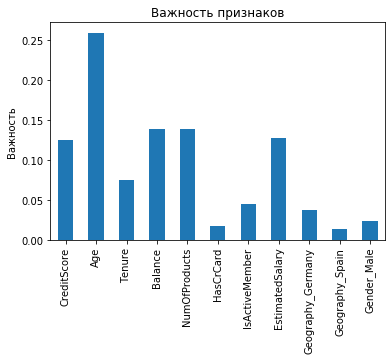

In [73]:
imp = pd.Series(best_model_random_forest.feature_importances_, features_train.columns)
plt.title('Важность признаков')
plt.ylabel('Важность')
imp.plot.bar()

<div class="alert alert-block alert-success">
<b>Успех:</b> С тестирование все порядке, достигнуты хорошие значения целевых метрик


## Вывод

Наилучшие результаты (аккуратность, f1_score и roc_auc_score) показывает модель RandomForestClassifier на масштабированных признаках после upscaling.